# Project: Investigate Soccer Database!

## Table of Contents
<ul>
    
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We will check the soccer dataset for soccer matches from 11 european countries from seasons 2008 to 2016

> We have large talbes like match which are include 26,000 match played during 8 years including the match results and each team line up and all match statictics 

> the second large tabel is the player attribute which include the all registered players and thier skills detailed and overall rating 

> there's also big tabel for team attribute which include the teams carteristics and abilities 

> we have another 5 tabels as reference for players, team, countries and league 

## Question

> 1- Who are the top 10 players with highest averaged overall ratings for time period 2008-2016? 

> 2- How has goal difference changed over seasons for each team? visualize 2 teams as example

> 3- Which foot is the most preferred foot among the players?


## exploring the soccer database

In [1]:
#importing the needed package to go on data investigation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# import sqlalchemy to read the database files
from sqlalchemy import create_engine 

In [3]:
engine = create_engine("sqlite:///database.sqlite")
conn = engine.connect()

In [4]:
engine.table_names()

['Country',
 'League',
 'Match',
 'Player',
 'Player_Attributes',
 'Team',
 'Team_Attributes',
 'sqlite_sequence']

<a id='wrangling'></a>
## Data Wrangling


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data types and look for instancs of missing or possibly errant data.
# read the counrty table and look in its data

df_countries = pd.read_sql_query('SELECT * FROM Country', engine)
df_countries = df_countries.rename({"id":"country_id" ,"name":"country"}, axis=1)
df_countries


,country_id,country
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [6]:
# read the league table and look in its data
df_league = pd.read_sql_query('SELECT * FROM League', engine)
df_league = df_league.rename({'id': 'league_id','name':'league'}, axis=1)
df_league.head(2)

,league_id,country_id,league
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [7]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
league_id     11 non-null int64
country_id    11 non-null int64
league        11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [8]:
# read the player table and look in its data

df_player = pd.read_sql_query('SELECT * FROM Player', engine)
df_player = df_player.rename({'id':'player_id'}, axis=1)
df_player.head(2)

,player_id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [9]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
player_id             11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [10]:
# read the player attributes table and look in its data

df_Player_Attributes = pd.read_sql_query('SELECT * FROM Player_Attributes', engine)
df_Player_Attributes = df_Player_Attributes.rename({'id':'player_id'},axis=1)

df_Player_Attributes.head(2)

,player_id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [74]:
# Create Function to show the columns title on each tabel
def col(df):
    for x in df.columns:
        print(x)
         

In [75]:
# show the columns on player attribues table
col(df_Player_Attributes)

player_id
player_fifa_api_id
player_api_id
date
overall_rating
potential
preferred_foot
attacking_work_rate
defensive_work_rate
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
free_kick_accuracy
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots
aggression
interceptions
positioning
vision
penalties
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [12]:
# read the teams table and look in its data

df_team = pd.read_sql_query('SELECT * FROM Team', engine)
df_team = df_team.rename({'id':'team_id'}, axis=1)
df_team.head(2)

,team_id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [13]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
team_id             299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [14]:
# read the teams attributes table and look in its data

df_Team_Attributes = pd.read_sql_query('SELECT * FROM Team_Attributes', engine)
df_Team_Attributes = df_Team_Attributes.rename({'id':'team_id'}, axis=1)
df_Team_Attributes.head(2)

,team_id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [76]:
col(df_Team_Attributes)

team_id
team_fifa_api_id
team_api_id
date
buildUpPlaySpeed
buildUpPlaySpeedClass
buildUpPlayDribbling
buildUpPlayDribblingClass
buildUpPlayPassing
buildUpPlayPassingClass
buildUpPlayPositioningClass
chanceCreationPassing
chanceCreationPassingClass
chanceCreationCrossing
chanceCreationCrossingClass
chanceCreationShooting
chanceCreationShootingClass
chanceCreationPositioningClass
defencePressure
defencePressureClass
defenceAggression
defenceAggressionClass
defenceTeamWidth
defenceTeamWidthClass
defenceDefenderLineClass


In [17]:
df_Team_Attributes.isnull().sum()

team_id                             0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [78]:
# read the match table and look in its data

df_match = pd.read_sql_query('SELECT * FROM Match', engine)
df_match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [79]:
col(df_match)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [80]:
# read the match table (select only needed columns to answer our questions) and look in its data

df_match = pd.read_sql_query('SELECT id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal  FROM Match', engine)
df_match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0


In [81]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



## Q1

> 1- Who are the top 10 players with highest averaged overall ratings for time period 2008-2016? 


In [36]:
#adding player names to dataframe
df_player_name = pd.merge(left=df_Player_Attributes, right=df_player, how='left', left_on='player_id', right_on='player_id')

In [37]:
#group by the player name and get the mean of overall rating
df_average = df_player_name.groupby('player_name')['overall_rating'].mean()
#get the top ten
df_average_sorted = df_average.sort_values(ascending=False).head(10)
df_average_sorted

player_name
Manu Torres        91.0
Manu Molina        91.0
Fede Vico          89.0
Manu Lanzarote     88.0
Miguel Portillo    87.0
Lorenzo Tonelli    87.0
Lorenzo Stovini    87.0
Lorenzo Squizzi    87.0
Lorenzo Pique      87.0
Pedrao             86.0
Name: overall_rating, dtype: float64

(85, 92)

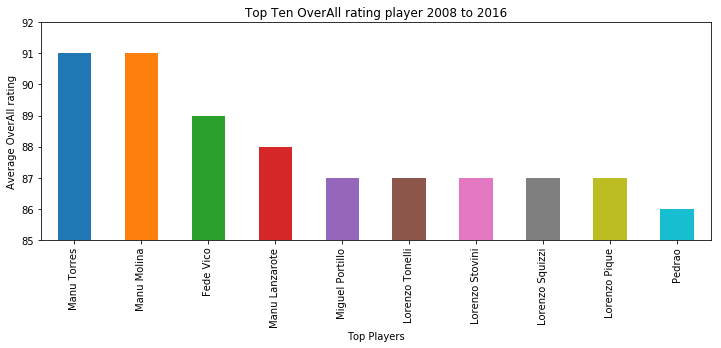

In [38]:
df_average_sorted.plot(kind='bar',figsize=[12,4],rot=90)
plt.title ('Top Ten OverAll rating player 2008 to 2016')
plt.xlabel('Top Players')
plt.ylabel('Average OverAll rating')
plt.ylim(85,92)

## Q2

> How has goal difference changed over seasons for each team? visualize 2 teams as example


In [39]:
#merging the team table to get the teams names
df_match_merge_home =  pd.merge(left=df_match, right=df_team, how='left', left_on='home_team_api_id' , right_on='team_api_id')

#slicing the data need to record home goals teams id and date
df_home_goal = df_match_merge_home[['season',  'home_team_goal', 'team_long_name']]

#group the dataframe by the year then by team api id and accumulate goals 
df_home_goal = df_home_goal.groupby(['team_long_name','season']).sum()



In [40]:
#merging the team table to get the teams names
df_match_merge_away =  pd.merge(left=df_match, right=df_team, how='left', left_on='away_team_api_id' , right_on='team_api_id')

#slicing the data need to record away goals teams id and date
df_away_goal = df_match_merge_away[['season',  'away_team_goal', 'team_long_name']]

#group the dataframe by the year then by team api id and accumulate goals 
df_away_goal = df_away_goal.groupby(['team_long_name', 'season']).sum()




In [61]:
#merging both dataframs to get the total goals(home and away) for each club by year

df_total_goal = pd.merge(right=df_away_goal,left=df_home_goal, how='outer', left_on=['team_long_name', 'season'], right_on=['team_long_name', 'season'])

df_total_goal['Total Goals'] = df_total_goal['home_team_goal']+ df_total_goal['away_team_goal']

df_total_goal = df_total_goal.drop(['home_team_goal', 'away_team_goal'],1)

df_total_goal.head()

Total Goals
team_long_name       season                
1. FC Kaiserslautern 2010/2011           48
                     2011/2012           24
1. FC Köln           2008/2009           35
                     2009/2010           33
                     2010/2011           47

Text(0,0.5,'Goal')

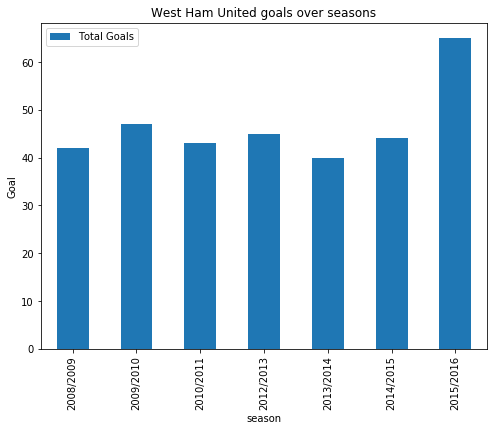

In [62]:
#Visualize the Total Goals of West Ham United team 
#slicing west hame data
df_west_ham = df_total_goal.loc['West Ham United',:]

df_west_ham.plot(kind='bar',rot=90, figsize=(8,6))
plt.title('West Ham United goals over seasons')
plt.ylabel('Goal')


## Q3 

> Which foot is the most preferred foot among the players?


Text(0,0.5,'number of players')

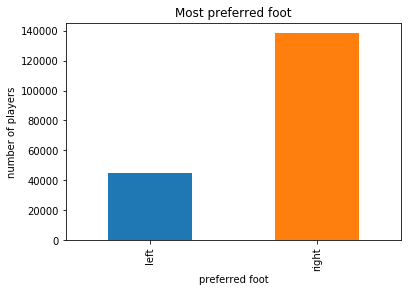

In [63]:
# Group by the preferred foot column to calcualte the count for each foot 

df_Player_Attributes.preferred_foot.groupby(df_Player_Attributes.preferred_foot).count().plot(kind='bar')
plt.title('Most preferred foot')
plt.xlabel('preferred foot')
plt.ylabel('number of players')

<a id='conclusions'></a>
## Conclusions

> 1- our analysis show to us top average over all rating and "Manu Torres" and "Manu Molina" are the best player on thier overall rating during priod 2008 to 2016 

> 2- Manchester united we found that total goals scored per season descreased because of sir alex fergison leave the club and the performance affected on bad way

> 3- West ham united have around 40-45 goal per season then have excelent improvment on performance on 2015/2016 season with 65 goal  

> 4-  the most preferred foot is Right with average 75% of players.  


> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.



## Limitations:

>1- overall_rating include 836 null values we can't expect from mean or median becasue it will be misleading

 